In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
raw_data = pd.read_csv("Fulani Herdsmen Data/punch-Table 1.csv")
raw_data.head()

,YEAR,PAPER,DATE OF REPORT,DATE OF INCIDENT,LOCATION,HEADLINE,LINK
0,NaN,NaN,24-Nov-19,23-Nov-19,Shuwa-Kalaa village in the Hong Local Governme...,Many feared dead as herdsmen invade Adamawa vi...,https://punchng.com/many-feared-dead-as-herdsm...
1,NaN,NaN,19-Nov-19,18-Nov-19,NaN,S’East youths give herdsmen ultimatum to vacat...,https://punchng.com/seast-youths-give-herdsmen...
2,NaN,NaN,12-Nov-19,NaN,NaN,‘Herdsmen harassing our women’,https://punchng.com/herdsmen-harassing-our-women/
3,NaN,NaN,11-Nov-19,NaN,NaN,Herdsmen from Plateau attacking my domain —Kad...,https://punchng.com/herdsmen-from-plateau-atta...
4,NaN,NaN,10-Nov-19,NaN,NaN,Governors reply Miyetti Allah: You can’t force...,https://punchng.com/governors-reply-miyetti-al...


In [3]:
raw_data.columns, raw_data.shape

(Index(['YEAR', 'PAPER', 'DATE OF REPORT', 'DATE OF INCIDENT', 'LOCATION',
        'HEADLINE', 'LINK'],
       dtype='object'),
 (930, 7))

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              1 non-null      float64
 1   PAPER             1 non-null      object 
 2   DATE OF REPORT    928 non-null    object 
 3   DATE OF INCIDENT  190 non-null    object 
 4   LOCATION          366 non-null    object 
 5   HEADLINE          928 non-null    object 
 6   LINK              927 non-null    object 
dtypes: float64(1), object(6)
memory usage: 51.0+ KB


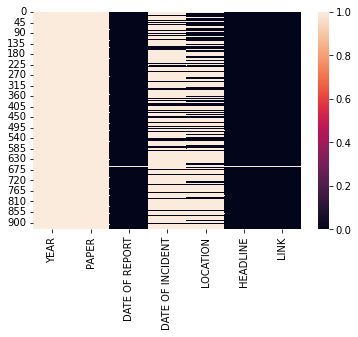

In [5]:
sns.heatmap(raw_data.isnull())
plt.show()

In [6]:
raw_data.dtypes

YEAR                float64
PAPER                object
DATE OF REPORT       object
DATE OF INCIDENT     object
LOCATION             object
HEADLINE             object
LINK                 object
dtype: object

In [7]:
def valid_datetime_string(string):
    if string == "":
        return False
    try:
        pd.Timestamp(string)
    except:
        return False
    
    return True

def validate_headlines(string):
    # remove non-strings
    if not isinstance(string, str):
        return False
    
    # remove strings that are links
    if 'http' in string:
        return False
    
    return True

In [8]:
clean = raw_data[raw_data['DATE OF REPORT'].map(valid_datetime_string)]
clean = raw_data[raw_data['HEADLINE'].map(validate_headlines)]
clean.shape

(928, 7)

In [9]:
clean['DATE OF REPORT'] = pd.to_datetime(clean['DATE OF REPORT'])
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 929
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   YEAR              1 non-null      float64       
 1   PAPER             1 non-null      object        
 2   DATE OF REPORT    928 non-null    datetime64[ns]
 3   DATE OF INCIDENT  190 non-null    object        
 4   LOCATION          366 non-null    object        
 5   HEADLINE          928 non-null    object        
 6   LINK              927 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 58.0+ KB


/var/folders/j0/tm8cdfh92s1gygqzq23h32sc0000gn/T/ipykernel_21379/767432500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['DATE OF REPORT'] = pd.to_datetime(clean['DATE OF REPORT'])


In [10]:
labels = ["YEAR", "PAPER", "DATE OF INCIDENT", "LOCATION"]
clean.drop(labels=labels, axis=1, inplace=True)
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 929
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE OF REPORT  928 non-null    datetime64[ns]
 1   HEADLINE        928 non-null    object        
 2   LINK            927 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 29.0+ KB


/var/folders/j0/tm8cdfh92s1gygqzq23h32sc0000gn/T/ipykernel_21379/3177092374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean.drop(labels=labels, axis=1, inplace=True)


In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()

results = [sia.polarity_scores(line) for line in clean.HEADLINE]

scores_df = pd.DataFrame.from_records(results)
df = scores_df.join(clean, rsuffix="_right")
df['ID'] = df.index
df.head()

,neg,neu,pos,compound,DATE OF REPORT,HEADLINE,LINK,ID
0,0.556,0.444,0.0,-0.8176,2019-11-24,Many feared dead as herdsmen invade Adamawa vi...,https://punchng.com/many-feared-dead-as-herdsm...,0
1,0.000,1.000,0.0,0.0000,2019-11-19,S’East youths give herdsmen ultimatum to vacat...,https://punchng.com/seast-youths-give-herdsmen...,1
2,0.538,0.462,0.0,-0.5423,2019-11-12,‘Herdsmen harassing our women’,https://punchng.com/herdsmen-harassing-our-women/,2
3,0.300,0.700,0.0,-0.4588,2019-11-11,Herdsmen from Plateau attacking my domain —Kad...,https://punchng.com/herdsmen-from-plateau-atta...,3
4,0.000,1.000,0.0,0.0000,2019-11-10,Governors reply Miyetti Allah: You can’t force...,https://punchng.com/governors-reply-miyetti-al...,4


In [12]:
negative = df.iloc[df.neg.idxmax()]
neutral = df.iloc[df.neu.idxmax()]
positive = df.iloc[df.pos.idxmax()]

print(f'Most negative: ({negative.HEADLINE}) {negative.neg}, {negative.neu}, {negative.pos}')
print(f'Most neutral: ({neutral.HEADLINE}) {neutral.neg}, {neutral.neu}, {neutral.pos}')
print(f'Most positive: ({positive.HEADLINE}) {positive.neg}, {positive.neu}, {positive.pos}')

Most negative: (Suspected herdsmen rape, kill Enugu widow) 0.79, 0.21, 0.0
Most neutral: (S’East youths give herdsmen ultimatum to vacate FUTO) 0.0, 1.0, 0.0
Most positive: (Again, suspected herdsmen killed 10 in Benue) 0.0, 0.435, 0.565


In [21]:
import altair as alt

df["compound_trunc"] = df.compound.round(1) 

res = (df.groupby(["compound_trunc"])["ID"]
        .count()
        .reset_index()
        .rename(columns={"ID": "count"})
      )

hist = alt.Chart(res).mark_bar(width=15).encode(
    alt.X("compound_trunc:Q", axis=alt.Axis(title="Polarity Score")),
    y=alt.Y('count:Q', axis=alt.Axis(title="Number of headlines")),
    color=alt.Color('compound_trunc:Q', scale=alt.Scale(scheme='redyellowgreen')), 
    tooltip=['compound_trunc', 'count']
).properties(
    title="Polarity scores of Punch Newspaper Herdsmen Headlines (2017-2019)"
)
# alt.title('Sentiments form Punch Newspaper')
hist

alt.Chart(...)

In [24]:
scatter = alt.Chart(df.sample(n=615, random_state=1)).mark_point().encode(
    alt.X("DATE OF REPORT", axis=alt.Axis(title="Date")),
    y=alt.Y('compound', axis=alt.Axis(title="Polarity Score")),
    color=alt.Color('compound:Q', scale=alt.Scale(scheme='redyellowgreen')), 
    tooltip=['HEADLINE','compound:Q', 'DATE OF REPORT', 'LINK']
).properties(
    title="Polarity scores of Punch Newspaper Herdsmen Headlines (2017-2019)"
)

scatter

alt.Chart(...)